In [49]:
import pandas as pd

In [50]:
url = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
train = pd.read_csv(url)
train.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel


car_id — идентификатор машины;
model / car_type / fuel_type — марка, класс и тип топлива машины;
car_rating / riders — общий рейтинг  и общее число поездок к концу 2021-го года;
year_to_start / year_to_work — год выпуска машины и начала работы в автопарке;
target_reg — количество дней до поломки;
target_class — класс поломки (всего 9 видов).

rides_info.csv — информация про поездки;
driver_info.csv — информация про водителей;
fix_info.csv— информация про ремонт машин.

In [51]:
url = 'https://drive.google.com/uc?id=1eqFIZCJTkXY-PsTeS-uz_DousIH3XQu-'  
rides_info = pd.read_csv(url) # rides_info - информация про поездки
rides_info.head()

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822


user_id / age /sex— идентификатор, возраст и пол водителя, соответственно;
user_rating — общий рейтинг пользователя за все поездки к концу 2021-го года;
user_rides — общее количество поездок к концу 2021-го года;
user_time_accident— число инцидентов (это могли быть аварии/штрафы/эвакуация машины);  
first_ride_date — дата первой поездки.

In [52]:
url = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/fix_info.csv'
fix_info = pd.read_csv(url)  # fix_info - информация про ремонт машин
fix_info.head()

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49
1,N-1530212S,LM,2020-2-9 20:25,repair,10.0,48
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.0,28
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.0,47


In [53]:
print(f"В данных {train.shape[0]} строк и {train.shape[1]} столбцов")

В данных 2337 строк и 10 столбцов


array([[<Axes: title={'center': 'car_rating'}>,
        <Axes: title={'center': 'year_to_start'}>,
        <Axes: title={'center': 'riders'}>,
        <Axes: title={'center': 'year_to_work'}>,
        <Axes: title={'center': 'target_reg'}>]], dtype=object)

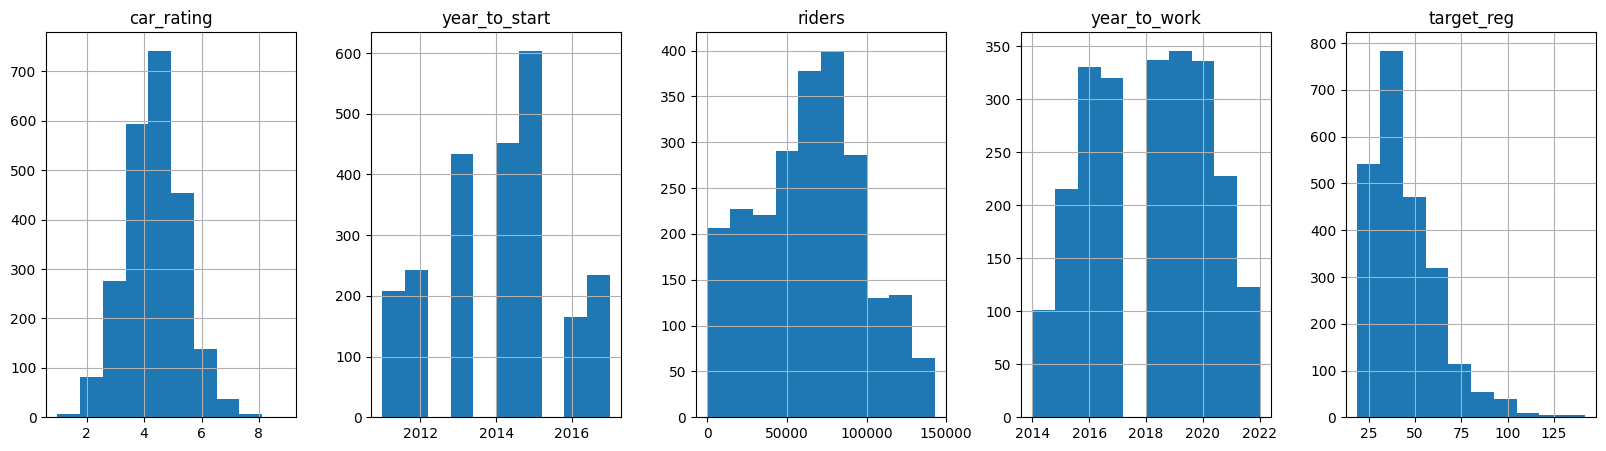

In [54]:
train.hist(figsize=(20, 5), layout=(-1, 5)) # гистограммы для всех числовых признаков

In [55]:
train.sample(3) # случайные 3 строки из таблицы train

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
1554,T77801635B,Skoda Rapid,economy,petrol,3.90,2016,96756,2015,40.36,engine_fuel
1386,e-1632869f,VW Polo,economy,petrol,4.48,2015,84498,2015,60.58,engine_overheat
1892,i-1641236y,Mercedes-Benz GLC,business,petrol,5.42,2015,76964,2020,35.19,break_bug


In [56]:
train.describe().T # основные статистики по всем признакам

,count,mean,std,min,25%,50%,75%,max
car_rating,2337.0,4.354292,0.996954,0.98,3.74,4.36,5.00,8.90
year_to_start,2337.0,2014.040650,1.685852,2011.00,2013.00,2014.00,2015.00,2017.00
riders,2337.0,63711.443731,33755.012096,23.00,41053.00,64415.00,86515.00,142862.00
year_to_work,2337.0,2018.069748,2.159484,2014.00,2016.00,2018.00,2020.00,2022.00
target_reg,2337.0,44.946735,17.579568,18.92,31.67,40.17,54.79,141.63


In [57]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv' # тестовые данные
test = pd.read_csv(path) # таблица с тестовыми данными
print(test.shape) # размер таблицы
test.sample(3) # случайные 3 строки из таблицы test

(1913, 8)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
1847,d-1302572o,Renault Kaptur,standart,petrol,5.88,2014,63564,2019
1698,V21379614l,Hyundai Solaris,economy,petrol,3.82,2015,80264,2020
721,C63413357V,Skoda Rapid,economy,petrol,4.10,2017,126077,2022


Классифицируем признаки на типы 

In [58]:
feature_to_drop = ['car_id'] # признак, который не несет полезной информации
targets = ['target_class', 'target_reg'] # целевые признаки, которые мы хотим предсказать
categorical_features = ['car_type', 'fuel_type', 'model'] # категориальные признаки, которые нужно будет закодировать

filtered_features = [i for i in train.columns if (i not in targets and i not in feature_to_drop)] # все признаки, кроме целевых и неинформативных, которые мы будем использовать для обучения модели
numerical_features = [i for i in filtered_features if i not in categorical_features] # числовые признаки, которые не нужно кодировать

print("Числовые признаки:", numerical_features, len(numerical_features), 
"\nКатегориальные признаки:", categorical_features, len(categorical_features), 
"\nЦелевые признаки:", targets, len(targets), 
"\nПризнаки для удаления:", feature_to_drop, len(feature_to_drop))

Числовые признаки: ['car_rating', 'year_to_start', 'riders', 'year_to_work'] 4 
Категориальные признаки: ['car_type', 'fuel_type', 'model'] 3 
Целевые признаки: ['target_class', 'target_reg'] 2 
Признаки для удаления: ['car_id'] 1


Обучаем CatBoost и делаем прогноз на тест

In [59]:
from catboost import CatBoostClassifier, CatBoostRegressor # библиотека для градиентного бустинга на деревьях решений
from sklearn.model_selection import train_test_split # библиотека для разбиения данных на обучающую и тестовую выборки
from sklearn.metrics import accuracy_score, mean_absolute_error # библиотеки для оценки качества модели

In [60]:
X = train[filtered_features].drop(targets, axis= 1, errors= 'ignore') # признаки для обучения модели
y = train['target_class'] # целевой признак для обучения модели


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разбиение данных на обучающую и тестовую выборки, 20% данных уйдет в тест, random_state для воспроизводимости
clf = CatBoostClassifier(cat_features=categorical_features) # инициализация модели градиентного бустинга, указываем категориальные признаки
clf.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=150, plot=False) # обучение модели на обучающей выборке, валидация на тестовой выборке, verbose - вывод прогресса обучения каждые 150 итераций, plot - не рисовать график обучения

y_pred = clf.predict(X_test) # прогноз на тестовой выборке
print(f"Точность модели: {accuracy_score(y_test, y_pred)}") # оценка качества модели по точности

Learning rate set to 0.109335
0:	learn: 2.1911361	test: 2.1951349	best: 2.1951349 (0)	total: 101ms	remaining: 1m 41s
150:	learn: 1.6539682	test: 2.2440578	best: 2.1908935 (6)	total: 14.8s	remaining: 1m 23s
300:	learn: 1.2455381	test: 2.3306861	best: 2.1908935 (6)	total: 23.1s	remaining: 53.5s
450:	learn: 0.9655173	test: 2.4024298	best: 2.1908935 (6)	total: 32.6s	remaining: 39.7s
600:	learn: 0.7488971	test: 2.4913589	best: 2.1908935 (6)	total: 42.9s	remaining: 28.5s
750:	learn: 0.5826318	test: 2.5762847	best: 2.1908935 (6)	total: 54s	remaining: 17.9s
900:	learn: 0.4643456	test: 2.6651694	best: 2.1908935 (6)	total: 1m 20s	remaining: 8.89s
999:	learn: 0.4027101	test: 2.7091668	best: 2.1908935 (6)	total: 1m 35s	remaining: 0us

bestTest = 2.19089351
bestIteration = 6

Shrink model to first 7 iterations.
Точность модели: 0.0876068376068376


In [61]:
test['target_class'] = clf.predict(test[filtered_features]).ravel()
test[['car_id', 'target_class']].to_csv('submission.csv', index=False)
print('CSV file saved!')

CSV file saved!


Добавим информацию про поездки из rides_info

In [62]:
rides_info.sample(3) # случайные 3 строки из таблицы rides_info

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
45393,N18904719N,D-1038999X,s1u,2020-03-21,8.09,53,736,66,79.943569,0,3089.029656,0,17.056755,3.941
384408,e13089626k,b-2298403w,W1q,2020-01-23,8.80,96,2874,48,76.000000,2,1856.243015,0,14.011523,-20.935
115806,d13181002S,I-2258340t,x1n,2020-02-20,4.25,37,587,63,104.647206,0,2445.378532,0,-1.354973,10.290


In [63]:
f = lambda x: x.nunique() # функция для подсчета количества уникальных значений в столбце
riders_df_gr = rides_info.groupby('car_id', as_index = False).agg(mean_rating = ('rating', 'mean'), # средний рейтинг
distance_sum = ('distance', 'sum'), # суммарное расстояние
rating_min = ('rating', 'min'), # минимальный рейтинг
speed_max = ('speed_max', 'max'), # максимальная скорость
user_ride_quality_median = ('user_ride_quality', 'median'), # медиана качества поездки
deviation_normal_count = ('deviation_normal', 'count'), # количество уникальных отклонений от нормы
user_uniq = ('user_id', f) # количество уникальных пользователей
) # группировка по car_id и агрегация по разным столбцам
riders_df_gr.head(5)

,car_id,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,A-1049127W,4.255172,1.125753e+07,0.1,179.729652,-0.288229,174,172
1,A-1079539w,4.088046,1.912765e+07,0.1,184.505566,2.508746,174,173
2,A-1162143G,4.662299,2.995194e+06,0.1,180.000000,0.639653,174,172
3,A-1228282M,4.225172,1.793685e+07,0.1,182.446070,-15.663698,174,174
4,A-1339912r,4.690115,1.202552e+07,0.1,152.000000,-9.893439,174,172


In [64]:
def add_features(df: pd.DataFrame) -> pd.DataFrame: # Функция для добавления новых признаков в таблицу
    ''' функция для добавления новых признаков в таблицу '''
    if 'mean_rating' not in df.columns:
        return df.merge(riders_df_gr) # если признаков из rides_info еще нет в таблице, то добавляем их
    return df # если признаки уже есть, то возвращаем таблицу без изменений

train = add_features(train) # добавляем новые признаки в таблицу train
test = add_features(test) # добавляем новые признаки в таблицу test

In [65]:
train.sample(3) # случайные 3 строки из таблицы train с новыми признаками

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
2101,d16699323u,Kia Rio X,economy,petrol,4.68,2015,72155,2016,51.25,engine_ignition,4.246322,8.600718e+06,0.1,188.186329,-7.784016,174,170
1496,U10311712e,VW Polo,economy,petrol,6.08,2011,2409,2018,29.46,engine_overheat,4.120172,1.726188e+07,0.1,193.565424,-5.801820,174,173
2043,Q-2229156F,Smart ForTwo,economy,petrol,6.44,2013,41238,2019,55.39,engine_check,4.724483,1.385308e+07,0.1,181.358409,-5.535065,174,171


In [66]:
train.to_csv('train_with_new_features.csv', index=False) # сохраняем таблицу train с новыми признаками в файл
test.to_csv('test_with_new_features.csv', index=False) # сохраняем таблицу test с новыми признаками в файл


In [67]:
filtered_features = [i for i in train.columns if (i not in targets and i not in feature_to_drop)] # все признаки, кроме целевых и неинформативных, которые мы будем использовать для обучения модели
num_features = [i for i in filtered_features if i not in categorical_features] # числовые признаки, которые не нужно кодировать


print('num_features :', len(num_features), num_features) # числовые признаки
print('categorical_features :', len(categorical_features), categorical_features) # категориальные признаки
print('targets', targets) # целевые признаки
print('feature_to_drop :', len(feature_to_drop), feature_to_drop) # неинформативные признаки

num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
categorical_features : 3 ['car_type', 'fuel_type', 'model']
targets ['target_class', 'target_reg']
feature_to_drop : 1 ['car_id']


Обучаем Catboost на новых данных и делаем новый прогноз

In [68]:
from sklearn.preprocessing import LabelEncoder
from functools import partial

X = train[filtered_features].drop(targets, axis=1, errors='ignore') # признаки для обучения модели
y = train['target_class'] # целевой признак для обучения модели
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Конвертация категориальных признаков в индексы, так как CatBoost принимает индексы категориальных признаков
categorical_features = [X.columns.get_loc(col) for col in categorical_features]

# Инициализация и обучение модели CatBoost с заданными гиперпараметрами
_orig_CatBoostClassifier = CatBoostClassifier
CatBoostClassifier = partial(_orig_CatBoostClassifier,
                             iterations=1000,
                             learning_rate=0.05,
                             depth=6,
                             random_state=42,
                             early_stopping_rounds=50,
                             auto_class_weights='Balanced',
                             verbose=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разбиение данных на обучающую и тестовую выборки, 20% данных уйдет в тест, random_state для воспроизводимости

clf = CatBoostClassifier(cat_features=categorical_features ) # инициализация модели градиентного бустинга, указываем категориальные признаки


clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=150, plot=False) # обучение модели на обучающей выборке, валидация на тестовой выборке, verbose - вывод прогресса обучения каждые 150 итераций, plot - не рисовать график обучения

# инференс модели
y_pred = clf.predict(X_test) # прогноз на тестовой выборке
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')     # оценка качества модели по точности

0:	learn: 2.0182026	test: 2.0250837	best: 2.0250837 (0)	total: 54.2ms	remaining: 54.2s
150:	learn: 0.4573705	test: 0.5647187	best: 0.5647187 (150)	total: 10.6s	remaining: 59.4s
300:	learn: 0.3430551	test: 0.5345753	best: 0.5341872 (268)	total: 21.7s	remaining: 50.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5341871829
bestIteration = 268

Shrink model to first 269 iterations.

 Accuracy: 0.7970085470085471


In [69]:
fi = clf.get_feature_importance(prettified=True) # важность признаков
fi # вывод важности признаков

,Feature Id,Importances
0,speed_max,36.662418
1,mean_rating,34.408204
2,rating_min,14.705861
3,model,3.344813
4,car_type,3.337062
5,user_uniq,2.768088
6,user_ride_quality_median,1.212410
7,riders,0.863712
8,distance_sum,0.843062
9,car_rating,0.674930


In [72]:
pred = clf.predict(test[filtered_features]).ravel()
# если метки были закодированы LabelEncoder'ом — декодируем обратно
if 'le' in globals():
    pred = le.inverse_transform(pred.astype(int))
test['target_class'] = pred
test[['car_id', 'target_class']].to_csv('simple_baseline_2.csv', index=False)
print('CSV file saved!')

CSV file saved!


In [73]:
test.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,P17494612l,Skoda Rapid,economy,petrol,4.80,2013,42269,2019,engine_overheat,3.746207,1.407539e+07,0.10,195.454152,10.566220,174,170
1,N-1530212S,Renault Sandero,standart,petrol,4.32,2015,90014,2016,electro_bug,4.318966,1.970390e+07,0.00,181.538685,11.807941,174,174
2,B-1154399t,Smart ForTwo,economy,petrol,4.46,2015,82684,2017,break_bug,5.134655,9.314946e+06,0.10,118.440645,14.862538,174,172
3,F12725233R,Smart ForFour,economy,petrol,2.80,2014,68833,2021,gear_stick,4.617356,9.336838e+06,0.83,112.829785,20.088904,174,172
4,l-1139189J,Skoda Rapid,economy,petrol,6.56,2013,42442,2021,electro_bug,4.287471,1.196250e+07,0.00,187.846088,3.698460,174,172
